In [225]:
import pandas as pd
import numpy as np
import os

import re
import nltk
# nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [153]:
data = pd.read_csv(os.getcwd() + '/datasets/rand_tweets.csv', usecols=range(0,4))
data_dep = pd.read_csv(os.getcwd() + '/datasets/depressive_tweets_processed.csv', sep='|', usecols=range(0,9), header=None)

In [154]:
data_dep.drop_duplicates(keep="first",inplace=True)
data.drop_duplicates(keep="first",inplace=True)

In [65]:
data.head()

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


In [66]:
data_dep.head()

,0,1,2,3,4,5,6,7,8
0,989292962323615744,2018-04-25,23:59:57,Eastern Standard Time,whosalli,The lack of this understanding is a small but ...,1,0,3
1,989292959844663296,2018-04-25,23:59:56,Eastern Standard Time,estermnunes,i just told my parents about my depression and...,1,0,2
2,989292951716155392,2018-04-25,23:59:54,Eastern Standard Time,TheAlphaAries,depression is something i don't speak about ev...,0,0,0
3,989292873664393218,2018-04-25,23:59:35,Eastern Standard Time,_ojhodgson,Made myself a tortilla filled with pb&j. My de...,1,0,0
4,989292856119472128,2018-04-25,23:59:31,Eastern Standard Time,DMiller96371630,@WorldofOutlaws I am gonna need depression med...,0,0,0


In [155]:
data = data[data['Sentiment'] == 1].iloc[:2345,[1,3]]
data_dep['Sentiment'] = 0
data_dep['SentimentText'] = data_dep[5]
data_dep.drop(5,axis=0, inplace=True)
data_dep = data_dep.iloc[:,[9,10]]
datset = pd.concat([data,data_dep], axis=0)
dataset.reset_index(drop=True,inplace=True)

In [163]:
dataset['Sentiment'].value_counts()

1    2345
0    2312
Name: Sentiment, dtype: int64

In [164]:
dataset.isnull().sum()

Sentiment        0
SentimentText    0
dtype: int64

In [171]:
ps = PorterStemmer()
corpus = []
for i in range(0, dataset.shape[0]):
    ##review = dataset['SentimentText'][i].replace(r"http\S+", "")
    review = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",dataset['SentimentText'][i]).lower().split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [221]:
pos_words = ''
for i in range(0,2345):
    pos_words += " ".join(corpus[i].split())+" "

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

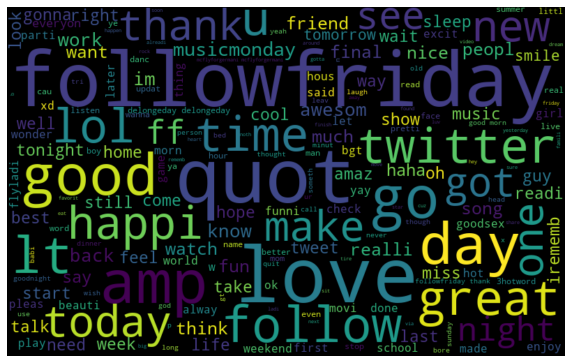

In [222]:
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pos_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [223]:
depress_words = ''
for i in range(2345,len(corpus)):
    depress_words += " ".join(corpus[i].split())+" "

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

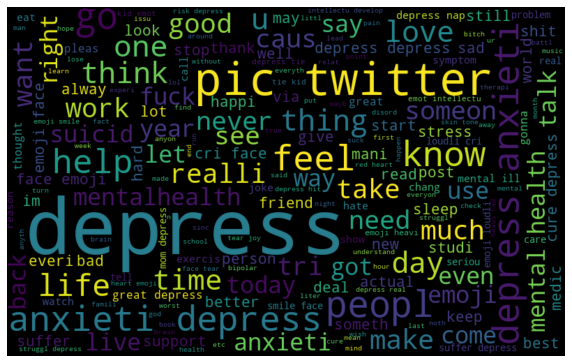

In [224]:
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(depress_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [232]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [244]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english') 
X = tfidf_vectorizer.fit_transform(corpus)
X.shape

(4657, 8527)

In [230]:
y = dataset['Sentiment']

# SVM

Linear Kernel

In [252]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [256]:
svc = SVC(kernel="linear", random_state=42)
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

scores = cross_validate(svc,X,y, scoring=scoring,cv=5)
print("Average Test Accuracy: " + str(scores['test_accuracy'].mean()) + "\n" 
      + "Average Test Precison: " + str(scores['test_precision'].mean()) + "\n" 
      + "Average Test Recall: " + str(scores['test_recall'].mean()) + "\n"
      + "Average Test f1_score: " + str(scores['test_f1_score'].mean()) + "\n")

Average Test Accuracy: 0.9922698376843396
Average Test Precison: 0.9848827358815091
Average Test Recall: 1.0
Average Test f1_score: 0.992383186748579



Gaussian Kernel

In [257]:
svc = SVC(kernel="rbf", random_state=42)
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

scores = cross_validate(svc,X,y, scoring=scoring,cv=5)
print("Average Test Accuracy: " + str(scores['test_accuracy'].mean()) + "\n" 
      + "Average Test Precison: " + str(scores['test_precision'].mean()) + "\n" 
      + "Average Test Recall: " + str(scores['test_recall'].mean()) + "\n"
      + "Average Test f1_score: " + str(scores['test_f1_score'].mean()) + "\n")

Average Test Accuracy: 0.9886199250425266
Average Test Precison: 0.9783273119830256
Average Test Recall: 0.9995735607675906
Average Test f1_score: 0.9888280179844973



# Naive Bayes